In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import plotly.express as px
from pandas_profiling import ProfileReport
from IPython.display import clear_output
import re
clear_output()

In [56]:
#!pip install requests
import requests

In [57]:
#dfSinistresComplement = pd.read_csv('D:/Esprit/4DS3/Projet DS/DataBaseCGA/Complement/Sinistre.csv',sep=';')
dfSinistresComplement = pd.read_csv('C:/Users/Meriem/Downloads/CGA/SinistreC.csv',sep=';')
dfSinistresComplement.head(3)

C:\Users\Meriem\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning:

Columns (12,15,16) have mixed types.Specify dtype option on import or set low_memory=False.



,sinistre_id,cga_police_id,cga_vehicule_id,cga_assure_id,date,numeroDuSinistre,dateDeSurvenanceDuSinistre,heureSurvanceDusinistre,dateOuvertureDuSinistre,lieuDuSinistre,identificationTiers,pourcentadeDeResponsabilite,numeroDePoliceCompagnieAdverse,codeCompagnieAdverse,porcentageCompagnieAdverse,numeroImmatriculationVehiculeAdverse,typeImmatriculationVehiculeAdverse,mouvementDusinistre,natureDuSinistre,Calculer_Sinistre
0,2,174557,166073,144565,NaN,S170155501,2017-12-18,0,2017-12-18,NaN,NaN,0,834736,11.0,0,1651TU133,TU,2,M,1
1,3,174557,166073,144565,NaN,S180017071,2018-02-16,0,2018-02-16,NaN,NaN,0,NaN,1.0,0,7046TU163,TU,2,M,1
2,4,174560,17936,119709,NaN,S170032921,2017-03-11,0,2017-03-27,NaN,NaN,100,010204000027,4.0,0,3626TU159,TU,3,M,1


In [58]:
dfSinistreRecord = dfSinistresComplement.groupby(dfSinistresComplement.dateOuvertureDuSinistre.tolist()).size().reset_index().rename(columns={0:'records'})
dfSinistreRecord

,index,records
0,1995-06-02,1
1,1999-08-23,1
2,2003-10-23,1
3,2004-11-03,1
4,2006-02-17,1
...,...,...
1923,2019-09-25,596
1924,2019-09-26,681
1925,2019-09-27,686
1926,2019-09-28,98


In [59]:
#dfWeather = pd.read_csv('D:/Esprit/4DS3/Projet DS/DataBaseCGA/Weather.csv')
dfWeather = pd.read_csv('C:/Users/Meriem/Downloads/CGA/Weather.csv')
dfWeather

,Unnamed: 0,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,0,"نابل, تونس",01/02/2017,60.1,41.5,48.9,39.9,NaN,0.01,0,0,5.3,193.00,9.2,5.7,16.1,71.15,Rain
1,1,"نابل, تونس",01/03/2017,62.1,41.5,50.8,38.1,NaN,0.01,0,0,8.2,228.67,18.3,5.6,15.9,67.23,Rain
2,2,"نابل, تونس",01/04/2017,61.5,50.2,54.8,NaN,NaN,0.00,0,0,15.3,249.67,28.9,6.0,33.9,69.17,Partially cloudy
3,3,"نابل, تونس",01/05/2017,61.1,50.4,55.2,NaN,NaN,0.01,0,0,27.4,271.96,53.0,6.1,32.0,65.06,"Rain, Partially cloudy"
4,4,"نابل, تونس",01/06/2017,51.9,44.5,48.4,38.9,NaN,0.20,0,0,23.8,318.46,36.9,6.1,33.5,56.17,"Rain, Partially cloudy"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,87,"نابل, تونس",12/28/2017,55.7,48.3,51.9,45.7,NaN,0.25,0,0,13.6,247.33,34.4,5.9,27.0,77.25,"Rain, Partially cloudy"
453,88,"نابل, تونس",12/29/2017,59.8,49.8,54.4,45.3,NaN,0.17,0,0,26.3,285.67,48.3,5.8,25.5,72.03,"Rain, Partially cloudy"
454,89,"نابل, تونس",12/30/2017,67.0,48.5,58.3,46.0,NaN,0.13,0,0,15.3,275.50,33.3,6.2,18.2,74.42,Rain
455,90,"نابل, تونس",12/31/2017,71.3,50.4,60.0,NaN,NaN,0.00,0,0,12.7,232.04,30.0,6.2,7.4,74.32,Clear


In [60]:
dfWeather.drop(['Unnamed: 0','Name','Wind Chill','Heat Index','Snow','Snow Depth'],axis=1,inplace=True)
dfWeather

,Date time,Maximum Temperature,Minimum Temperature,Temperature,Precipitation,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,01/02/2017,60.1,41.5,48.9,0.01,5.3,193.00,9.2,5.7,16.1,71.15,Rain
1,01/03/2017,62.1,41.5,50.8,0.01,8.2,228.67,18.3,5.6,15.9,67.23,Rain
2,01/04/2017,61.5,50.2,54.8,0.00,15.3,249.67,28.9,6.0,33.9,69.17,Partially cloudy
3,01/05/2017,61.1,50.4,55.2,0.01,27.4,271.96,53.0,6.1,32.0,65.06,"Rain, Partially cloudy"
4,01/06/2017,51.9,44.5,48.4,0.20,23.8,318.46,36.9,6.1,33.5,56.17,"Rain, Partially cloudy"
...,...,...,...,...,...,...,...,...,...,...,...,...
452,12/28/2017,55.7,48.3,51.9,0.25,13.6,247.33,34.4,5.9,27.0,77.25,"Rain, Partially cloudy"
453,12/29/2017,59.8,49.8,54.4,0.17,26.3,285.67,48.3,5.8,25.5,72.03,"Rain, Partially cloudy"
454,12/30/2017,67.0,48.5,58.3,0.13,15.3,275.50,33.3,6.2,18.2,74.42,Rain
455,12/31/2017,71.3,50.4,60.0,0.00,12.7,232.04,30.0,6.2,7.4,74.32,Clear


In [61]:
dfWeather['Date time'] = pd.to_datetime(dfWeather['Date time'], format='%m/%d/%Y')
dfSinistreRecord['index'] = pd.to_datetime(dfSinistreRecord['index'], format='%Y-%m-%d')

In [62]:
dfSinistresEtWeather = pd.merge(dfWeather,dfSinistreRecord ,how="inner", left_on="Date time",right_on="index")
dfSinistresEtWeather.head()

,Date time,Maximum Temperature,Minimum Temperature,Temperature,Precipitation,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions,index,records
0,2017-01-02,60.1,41.5,48.9,0.01,5.3,193.00,9.2,5.7,16.1,71.15,Rain,2017-01-02,173
1,2017-01-03,62.1,41.5,50.8,0.01,8.2,228.67,18.3,5.6,15.9,67.23,Rain,2017-01-03,205
2,2017-01-04,61.5,50.2,54.8,0.00,15.3,249.67,28.9,6.0,33.9,69.17,Partially cloudy,2017-01-04,193
3,2017-01-05,61.1,50.4,55.2,0.01,27.4,271.96,53.0,6.1,32.0,65.06,"Rain, Partially cloudy",2017-01-05,162
4,2017-01-06,51.9,44.5,48.4,0.20,23.8,318.46,36.9,6.1,33.5,56.17,"Rain, Partially cloudy",2017-01-06,198


# Data Preparation for modeling 

In [63]:
dfSinistresEtWeather.isna().sum()

Date time              0
Maximum Temperature    0
Minimum Temperature    0
Temperature            0
Precipitation          0
Wind Speed             0
Wind Direction         0
Wind Gust              5
Visibility             0
Cloud Cover            0
Relative Humidity      0
Conditions             0
index                  0
records                0
dtype: int64

In [64]:
dfSinistresEtWeather.dropna(inplace=True)
dfSinistresEtWeather.isna().sum()

Date time              0
Maximum Temperature    0
Minimum Temperature    0
Temperature            0
Precipitation          0
Wind Speed             0
Wind Direction         0
Wind Gust              0
Visibility             0
Cloud Cover            0
Relative Humidity      0
Conditions             0
index                  0
records                0
dtype: int64

In [65]:
#Engineer Datetime Features
dfSinistresEtWeather['year'] = dfSinistresEtWeather['Date time'].dt.year
dfSinistresEtWeather['month'] = dfSinistresEtWeather['Date time'].dt.month
dfSinistresEtWeather['week'] = dfSinistresEtWeather['Date time'].dt.week
dfSinistresEtWeather['day'] = dfSinistresEtWeather['Date time'].dt.day
dfSinistresEtWeather['dayofweek'] = dfSinistresEtWeather['Date time'].dt.dayofweek

<ipython-input-65-d701f1d31ba3>:4: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [66]:
fig = px.line(dfSinistresEtWeather, x="Date time", y="records")
fig.show()

In [67]:
dfSinistresEtWeather.Conditions.unique()

array(['Rain', 'Partially cloudy', 'Rain, Partially cloudy', 'Clear'],
      dtype=object)

In [68]:
dfSinistresEtWeather.Conditions.replace('Clear',0,inplace = True)
dfSinistresEtWeather.Conditions.replace('Partially cloudy',1,inplace = True)
dfSinistresEtWeather.Conditions.replace('Rain',2,inplace = True)
dfSinistresEtWeather.Conditions.replace('Rain, Partially cloudy',3,inplace = True)

In [69]:
dfSinistresEtWeather

,Date time,Maximum Temperature,Minimum Temperature,Temperature,Precipitation,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions,index,records,year,month,week,day,dayofweek
0,2017-01-02,60.1,41.5,48.9,0.01,5.3,193.00,9.2,5.7,16.1,71.15,2,2017-01-02,173,2017,1,1,2,0
1,2017-01-03,62.1,41.5,50.8,0.01,8.2,228.67,18.3,5.6,15.9,67.23,2,2017-01-03,205,2017,1,1,3,1
2,2017-01-04,61.5,50.2,54.8,0.00,15.3,249.67,28.9,6.0,33.9,69.17,1,2017-01-04,193,2017,1,1,4,2
3,2017-01-05,61.1,50.4,55.2,0.01,27.4,271.96,53.0,6.1,32.0,65.06,3,2017-01-05,162,2017,1,1,5,3
4,2017-01-06,51.9,44.5,48.4,0.20,23.8,318.46,36.9,6.1,33.5,56.17,3,2017-01-06,198,2017,1,1,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,2017-12-29,59.8,49.8,54.4,0.17,26.3,285.67,48.3,5.8,25.5,72.03,3,2017-12-29,905,2017,12,52,29,4
425,2017-12-30,67.0,48.5,58.3,0.13,15.3,275.50,33.3,6.2,18.2,74.42,2,2017-12-30,153,2017,12,52,30,5
426,2017-12-30,67.0,48.5,58.3,0.13,15.3,275.50,33.3,6.2,18.2,74.42,2,2017-12-30,153,2017,12,52,30,5
427,2017-12-31,71.3,50.4,60.0,0.00,12.7,232.04,30.0,6.2,7.4,74.32,0,2017-12-31,223,2017,12,52,31,6


<AxesSubplot:>

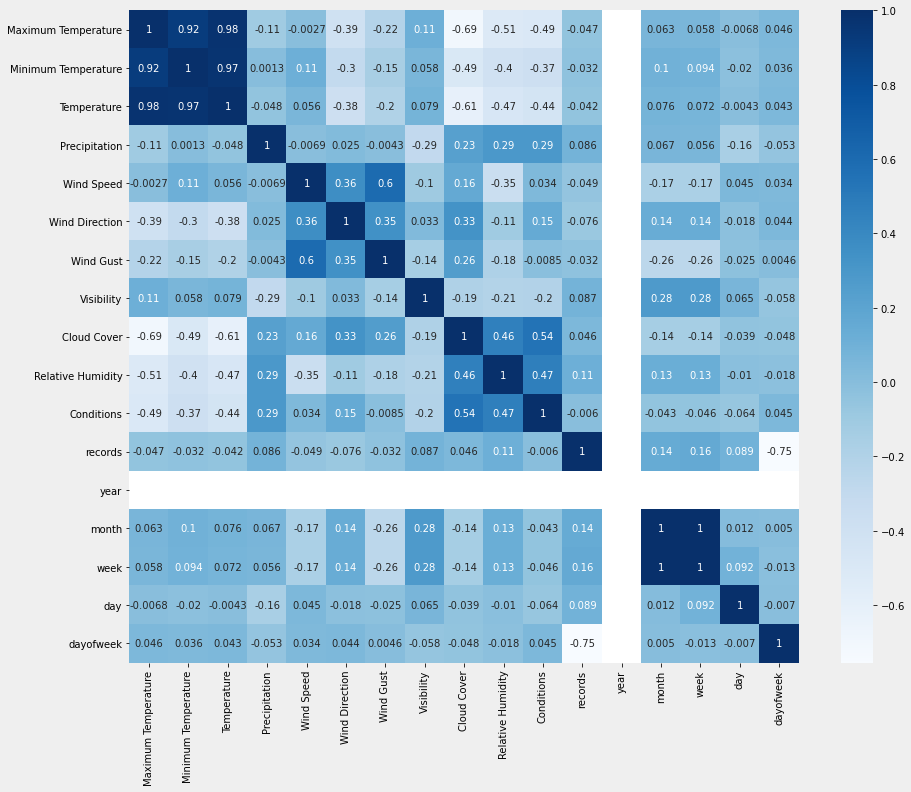

In [70]:
fig =  plt.figure(figsize=(15,12),facecolor='#efefef')
sns.heatmap(dfSinistresEtWeather.corr(), annot=True,cmap="Blues")


In [71]:
dfSinistresEtWeather=dfSinistresEtWeather.drop(['index','Date time','year'],axis=1)

In [72]:
target = dfSinistresEtWeather['records']
FeaturesSinistresEtWeather = dfSinistresEtWeather.drop(['records',],axis=1)

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(FeaturesSinistresEtWeather, target, test_size=0.2, random_state=333)

In [74]:
# Feature Scaling
#from sklearn.preprocessing import StandardScaler

#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [75]:
#from sklearn.ensemble import RandomForestRegressor

#regressor = RandomForestRegressor(n_estimators=42, random_state=0)
#regressor.fit(X_train, Y_train)
#y_pred = regressor.predict(X_test)

In [76]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score , train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [77]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, Y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [78]:
#Base models
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
regressor = make_pipeline(RobustScaler(), RandomForestRegressor(n_estimators=42, random_state=0))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
#xgb= make_pipeline(RobustScaler(), XGBClassifier(booster = "gbtree", objective = "binary:logistic", eta=0.3, gamma=0, max_depth=6, min_child_weight=1, subsample=1, colsample_bytree=1))
#lgbm = LGBMClassifier()
lgbm=make_pipeline(RobustScaler(), LGBMClassifier())
#xgb=XGBClassifier(learning_rate =0.1,n_estimators=1000,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
xgb=XGBClassifier(booster ="gbtree", objective = "binary:logistic", eta=0.3, gamma=0, max_depth=6, min_child_weight=1, subsample=1, colsample_bytree=1)

In [79]:
#Base models scores
model =['lasso','ElasticNet','regressor','KernelRidge','GradientBoostingRegressor','XGBoost','lightGBM']
lassoBase = rmsle_cv(lasso).mean()
ENetBase =  rmsle_cv(ENet).mean()
regressorBase =rmsle_cv(regressor).mean()
KRRBase =rmsle_cv(KRR).mean()
GBoostBase =rmsle_cv(GBoost).mean()
xgBase =rmsle_cv(xgb).mean()
lightgbm=rmsle_cv(lgbm).mean()
scores = [lassoBase ,ENetBase, regressorBase, KRRBase, GBoostBase ,xgBase ,lightgbm]
clear_output()
evaluteBase = pd.DataFrame([model,scores],index=['model',"mean_squared_error"]).T
evaluteBase.sort_values(by=['mean_squared_error'],inplace=True)


In [80]:
fig = px.bar(evaluteBase,x='model',y='mean_squared_error')
fig.show()

Hyperparameter Tuning  

In [81]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [82]:
#Random Search Training
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, 
                               verbose=2, random_state=42, n_jobs = -1, scoring="neg_mean_squared_error")# Fit the random search model
rf_random.fit(X_train, Y_train)
print(rf_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.5min finished


{'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': True}


In [83]:
search_grid={'n_estimators':[500,1000,2000],
             'learning_rate':[.001,0.01,.1],
             'max_depth':[1,2,4],
             'subsample':[.5,.75,1],
             'random_state':[1]}
#Random Search Training
GBR_Opt=GradientBoostingRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
GBR_Opt = RandomizedSearchCV(estimator = GBR_Opt, param_distributions= search_grid, n_iter = 100, cv = 3, 
                             verbose=2, random_state=42, n_jobs = -1, scoring="neg_mean_squared_error")# Fit the random search model
GBR_Opt.fit(X_train, Y_train)
pprint(GBR_Opt.best_params_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


C:\Users\Meriem\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning:

The total space of parameters 81 is smaller than n_iter=100. Running 81 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:   56.1s finished


{'learning_rate': 0.01,
 'max_depth': 2,
 'n_estimators': 1000,
 'random_state': 1,
 'subsample': 0.5}


In [84]:
search_grid={'learning_rate': [0.01, 0.05, 0.1],
              'max_depth': [3, 5, 7, 10], 
              'min_child_weight': [1, 5, 10],
              'subsample': [0.5, 0.7, 0.9],
              'colsample_bytree': [0.6, 0.8, 1.0],
              'gamma': [0, 0.05, 0.1],
              'scale_pos_weight':[1,2,3]}
                    
#Random Search Training
xgb_opt=XGBClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
xgb_opt= RandomizedSearchCV(estimator = xgb_opt, param_distributions= search_grid, n_iter = 100, cv = 3, 
                             verbose=2, random_state=42, n_jobs = -1, scoring="neg_mean_squared_error")# Fit the random search model
xgb_opt.fit(X_train, Y_train)
pprint(xgb_opt.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\Meriem\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 10.1min finished
C:\Users\Meriem\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:23:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:23:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'colsample_bytree': 0.8,
 'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_weight': 1,
 'scale_pos_weight': 3,
 'subsample': 0.9}


In [85]:
search_grid= {'learning_rate': [0.01, 0.05, 0.1],
               'n_estimators' : [100, 1000, 2000],
               'max_depth': [-1, 3, 5, 7],
               'min_child_weight': [1, 10, 100],
               'subsample': [0.5, 0.7, 0.9],
               'colsample_bytree': [0.6, 0.8, 1.0],
               'reg_alpha': [0, 1, 5, 10],
               'scale_pos_weight':[1, 1.5, 2]}                    
#Random Search Training
lgbm_opt=LGBMClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
lgbm_opt= RandomizedSearchCV(estimator = lgbm_opt, param_distributions= search_grid, n_iter = 100, cv = 3, 
                             verbose=2, random_state=42, n_jobs = -1, scoring="neg_mean_squared_error")# Fit the random search model
lgbm_opt.fit(X_train, Y_train)
pprint(lgbm_opt.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\Meriem\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.2min
C:\Users\Meriem\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:688: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 21.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 36.3min finished


{'colsample_bytree': 0.8,
 'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 2000,
 'reg_alpha': 1,
 'scale_pos_weight': 1.5,
 'subsample': 0.7}


In [86]:
params = {'alpha': (np.logspace(-8, 8, 100))}
Lasso_Opt=Lasso( normalize = True)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
Lasso_Opt = RandomizedSearchCV(estimator = Lasso_Opt, param_distributions= params, n_iter = 100, cv = 3, 
                             verbose=2, random_state=42, n_jobs = -1, scoring="neg_mean_squared_error")# Fit the random search model
Lasso_Opt.fit(X_train, Y_train)
pprint(Lasso_Opt.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s


{'alpha': 0.8302175681319752}


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.0s finished


In [87]:
# define model
ElasticNet_Opt = ElasticNet()
# define grid
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = np.arange(0, 1, 0.01)
ElasticNet_Opt = RandomizedSearchCV(estimator = ElasticNet_Opt, param_distributions= grid, n_iter = 100, cv = 3, 
                             verbose=2, random_state=42, n_jobs = -1, scoring="neg_mean_squared_error")# Fit the random search model
ElasticNet_Opt.fit(X_train, Y_train)
pprint(ElasticNet_Opt.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s


{'alpha': 1.0, 'l1_ratio': 0.75}


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.1s finished


In [88]:
!pip install LogUniform

In [89]:
from sklearn.linear_model import LogisticRegression
from scipy.stats import loguniform
LG_Opt = LogisticRegression()
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

LG_Opt = LogisticRegression()
LG_Opt = RandomizedSearchCV(estimator = LG_Opt, param_distributions= space, n_iter = 100, cv = 3, 
                             verbose=2, random_state=42, n_jobs = -1, scoring="neg_mean_squared_error")# Fit the random search model
LG_Opt.fit(X_train, Y_train)
pprint(LG_Opt.best_params_)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


C:\Users\Meriem\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning:

The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.

C:\Users\Meriem\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:  2.1min finished


{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


C:\Users\Meriem\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [90]:
from sklearn.linear_model import Ridge
# define search space
# define search space
space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]

Ridge_Opt = Ridge()
Ridge_Opt = RandomizedSearchCV(estimator = Ridge_Opt, param_distributions= space, n_iter = 100, cv = 3, 
                             verbose=2, random_state=42, n_jobs = -1, scoring="neg_mean_squared_error")# Fit the random search model
Ridge_Opt.fit(X_train, Y_train)
pprint(Ridge_Opt.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s


{'alpha': 10, 'fit_intercept': False, 'normalize': False, 'solver': 'lsqr'}


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.0s finished


Evaluation 

In [91]:
from sklearn import metrics
def evalute_model(model):
  y_pred = model.predict(X_test)
  print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
  print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
  print("Median Absolute Error:", metrics.median_absolute_error(Y_test, y_pred))
  print("coefficient of determination R^2:", metrics.r2_score(Y_test, y_pred) )
    

In [92]:
def VizPredict(model):
  # Look at predictions on training and validation set
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  fig =  plt.figure(figsize=(20,20),facecolor='#efefef')
  # Plot residuals
  ax1 = fig.add_subplot(3,1,1,title='regression')
  ax1.scatter(y_train_pred, y_train_pred - Y_train, c = "blue", marker = "s", label = "Training data")
  ax1.scatter(y_test_pred, y_test_pred - Y_test, c = "lightgreen", marker = "s", label = "Validation data")
  ax1.set_xlabel("Predicted values")
  ax1.set_ylabel("Residuals")

  # Plot predictions
  ax2 = fig.add_subplot(3,2,1,title='regression')
  ax2.scatter(y_train_pred, Y_train, c = "blue", marker = "s", label = "Training data")
  ax2.scatter(y_test_pred, Y_test, c = "lightgreen", marker = "s", label = "Validation data")
  ax2.set_xlabel("Predicted values")
  ax2.set_ylabel("Real values")

  ax3 = fig.add_subplot(3,1,2,title='Ytrue - Ypred')
  err_hist = np.abs(Y_test-y_test_pred)
  ax3.hist(err_hist,bins=85)


Mean Absolute Error: 154.0235294117647
Mean Squared Error: 68467.01176470588
Root Mean Squared Error: 261.66201819275545
Median Absolute Error: 59.0
coefficient of determination R^2: 0.33822271954299055


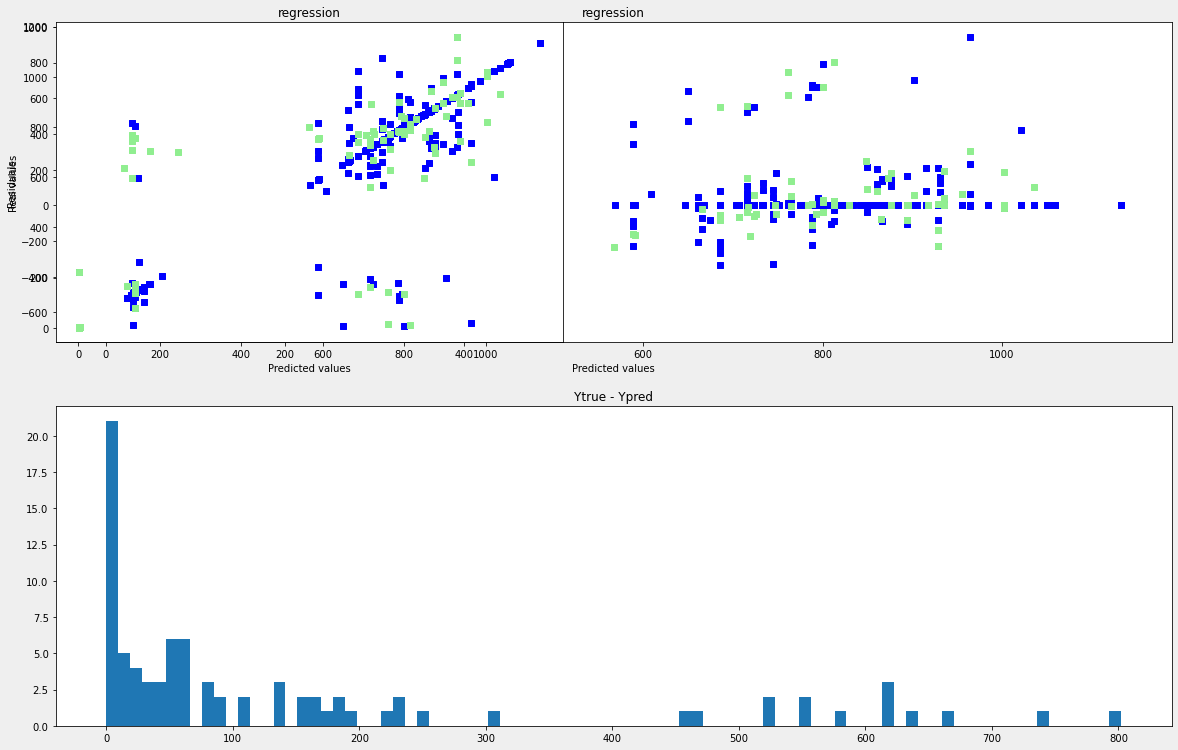

In [93]:
evalute_model(xgb_opt)
VizPredict(xgb_opt)

Mean Absolute Error: 371.7294117647059
Mean Squared Error: 233342.1294117647
Root Mean Squared Error: 483.05499626001665
Median Absolute Error: 264.0
coefficient of determination R^2: -1.255400313786844


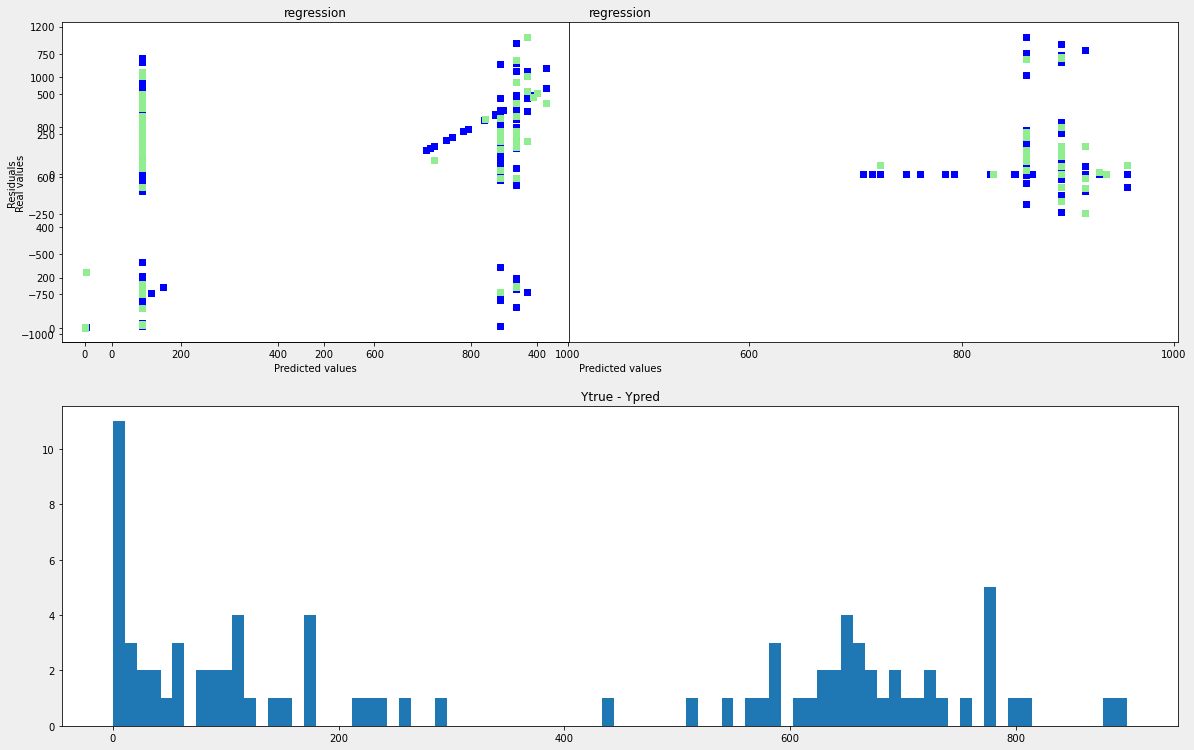

In [94]:
evalute_model(lgbm_opt)
VizPredict(lgbm_opt)

Mean Absolute Error: 158.81176470588235
Mean Squared Error: 79390.6705882353
Root Mean Squared Error: 281.76350116407076
Median Absolute Error: 60.0
coefficient of determination R^2: 0.23263859891977967


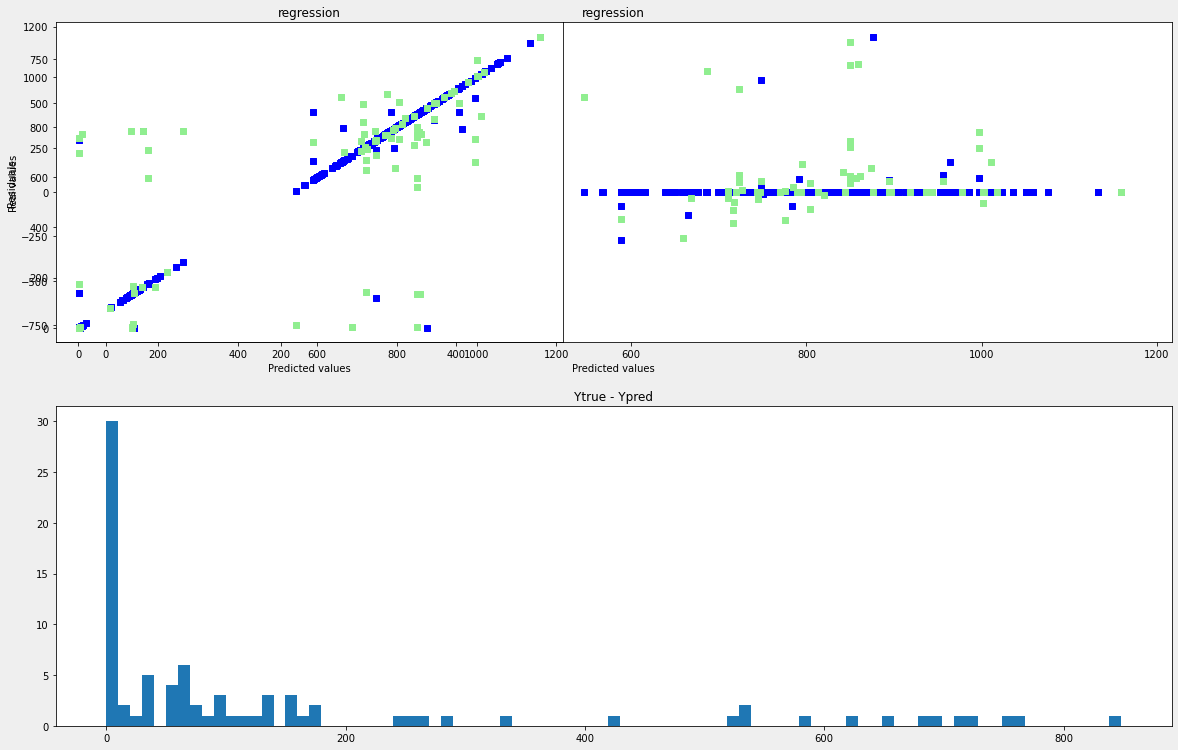

In [95]:
evalute_model(LG_Opt)
VizPredict(LG_Opt)

Mean Absolute Error: 157.79577876732287
Mean Squared Error: 37716.02976853363
Root Mean Squared Error: 194.20615275663548
Median Absolute Error: 131.82189853041996
coefficient of determination R^2: 0.6354505481321115


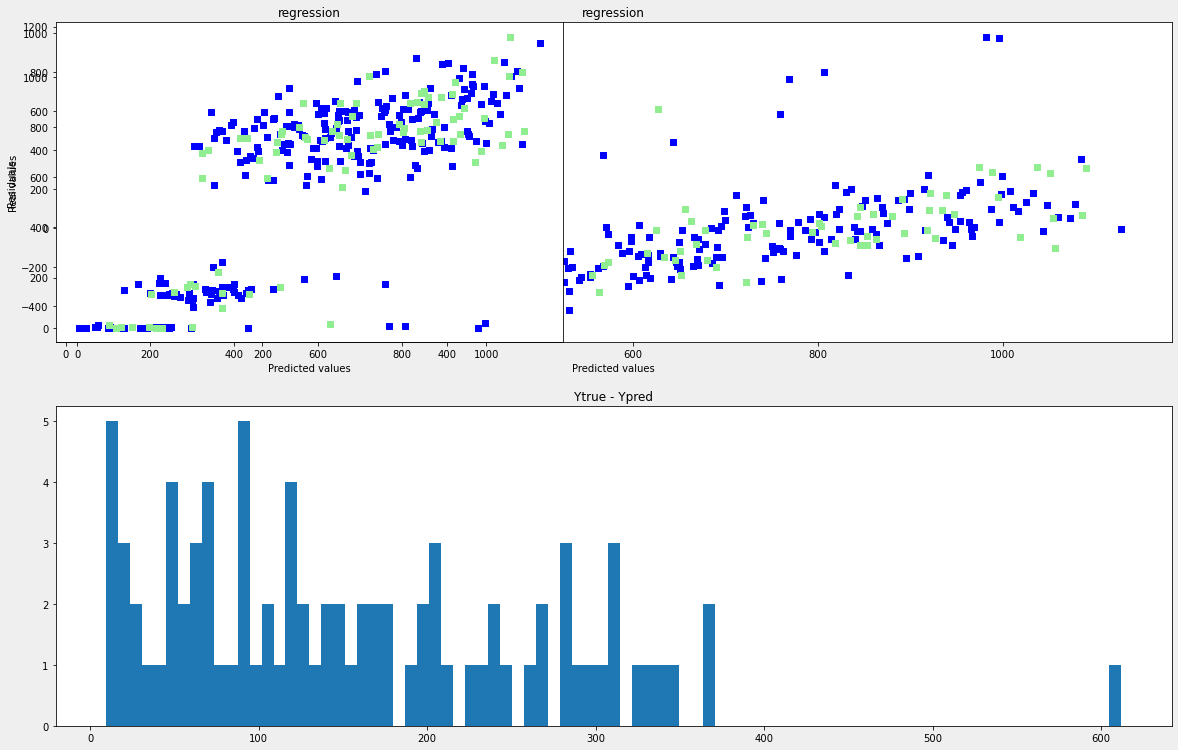

In [96]:
evalute_model(Ridge_Opt)
VizPredict(Ridge_Opt)

Mean Absolute Error: 154.72802772895216
Mean Squared Error: 36313.629576324536
Root Mean Squared Error: 190.5613538373522
Median Absolute Error: 148.23411765363664
coefficient of determination R^2: 0.6490056392831897


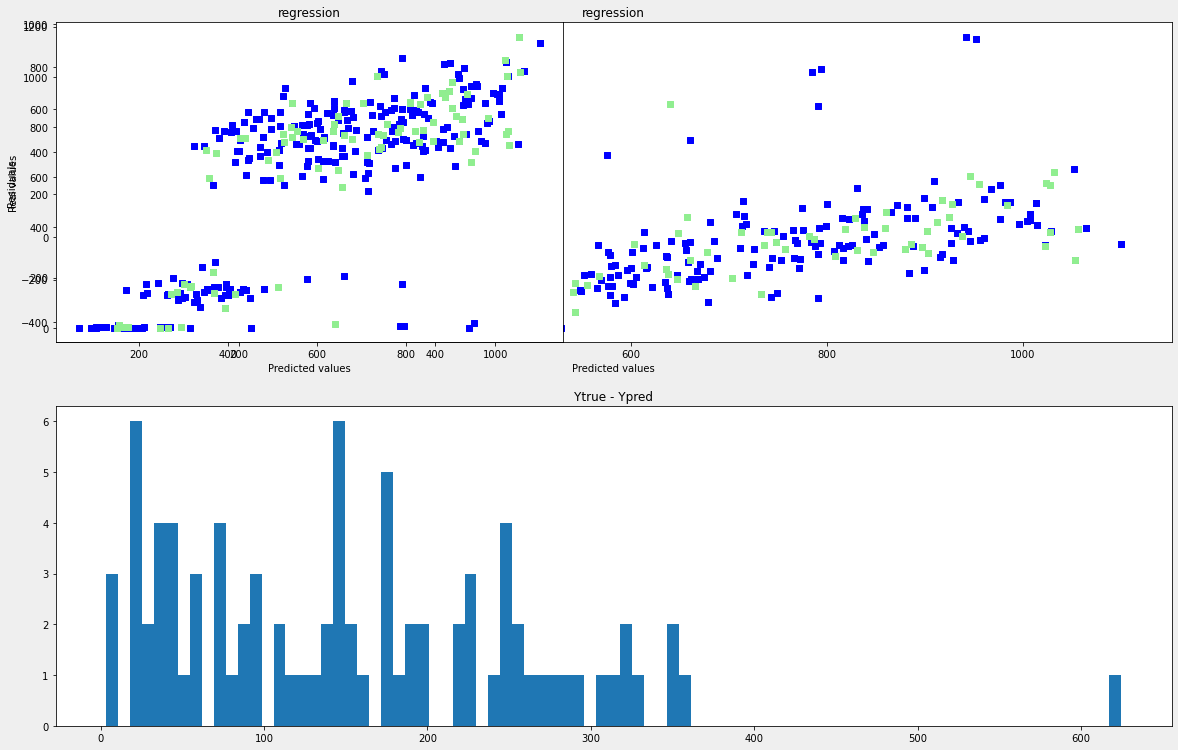

In [97]:
evalute_model(ElasticNet_Opt)
VizPredict(ElasticNet_Opt)

Mean Absolute Error: 148.90285165961683
Mean Squared Error: 34370.07263579004
Root Mean Squared Error: 185.39167358808228
Median Absolute Error: 155.22993945074563
coefficient of determination R^2: 0.6677913551099652


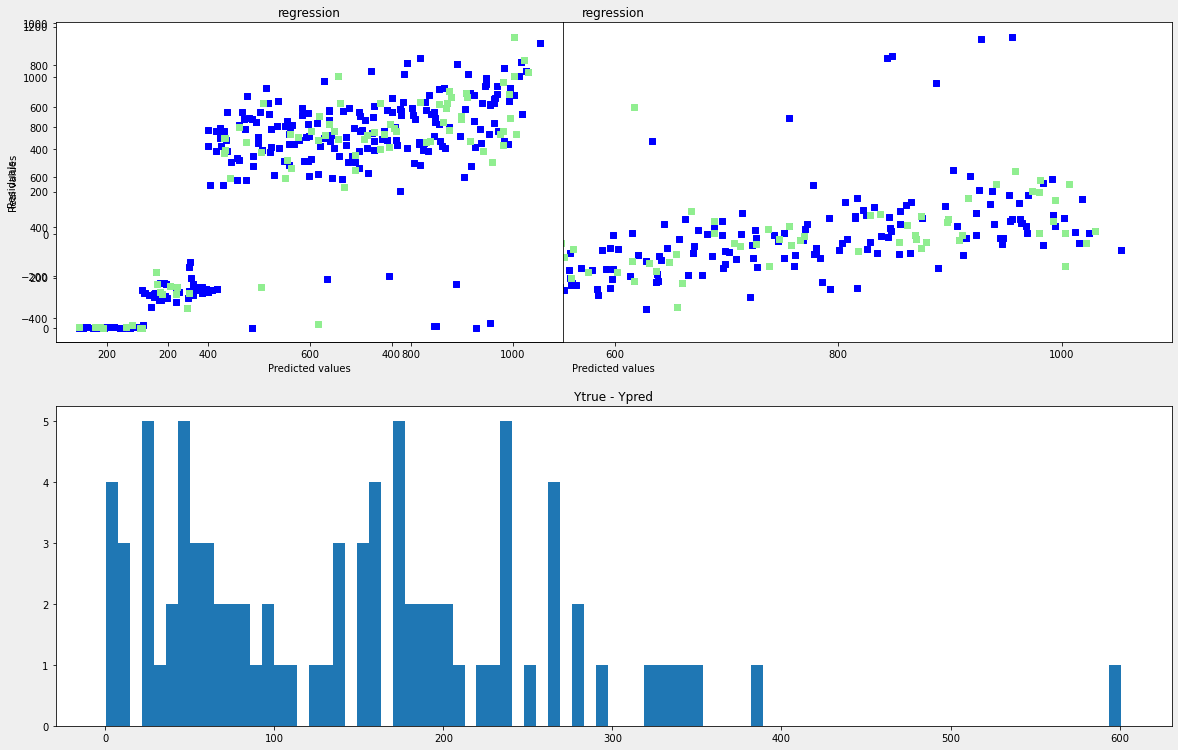

In [98]:
evalute_model(Lasso_Opt)
VizPredict(Lasso_Opt)

Mean Absolute Error: 70.81639514035194
Mean Squared Error: 15591.02988123193
Root Mean Squared Error: 124.8640455905219
Median Absolute Error: 39.50029493475893
coefficient of determination R^2: 0.8493027651070297


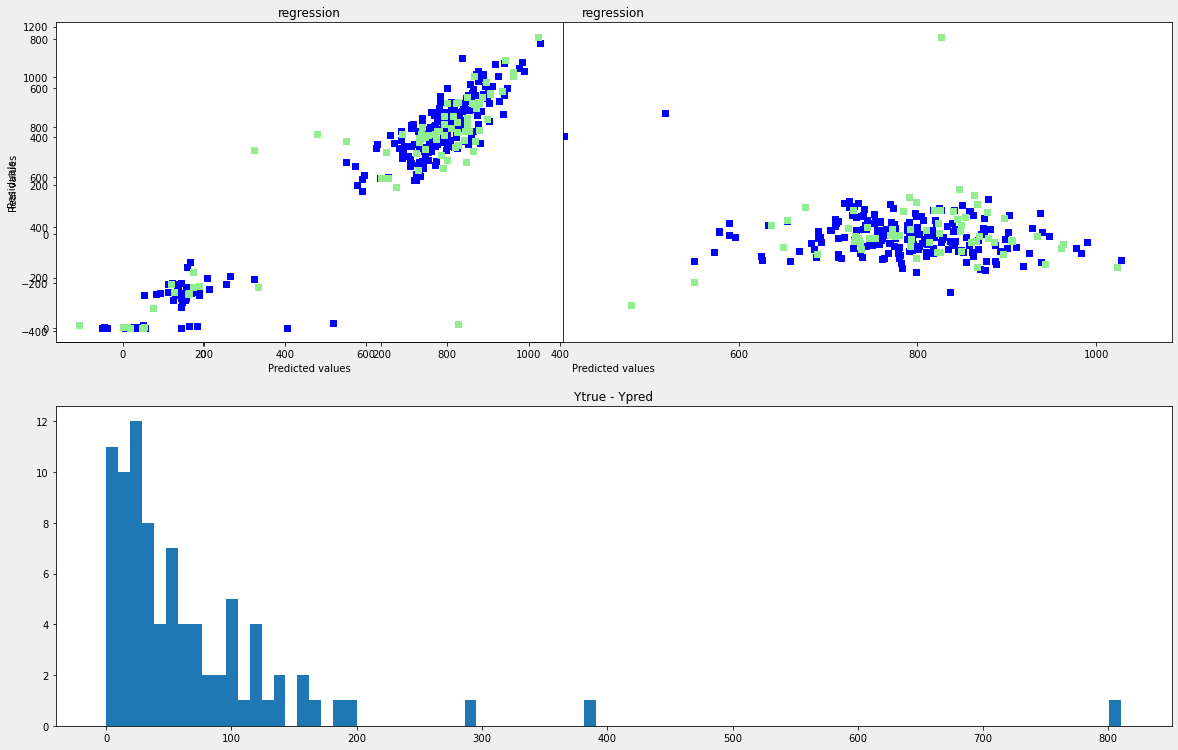

In [99]:
evalute_model(GBR_Opt)
VizPredict(GBR_Opt)

Mean Absolute Error: 56.12442016806722
Mean Squared Error: 12518.543172701084
Root Mean Squared Error: 111.88629573232409
Median Absolute Error: 32.410714285714334
coefficient of determination R^2: 0.8790003062411385


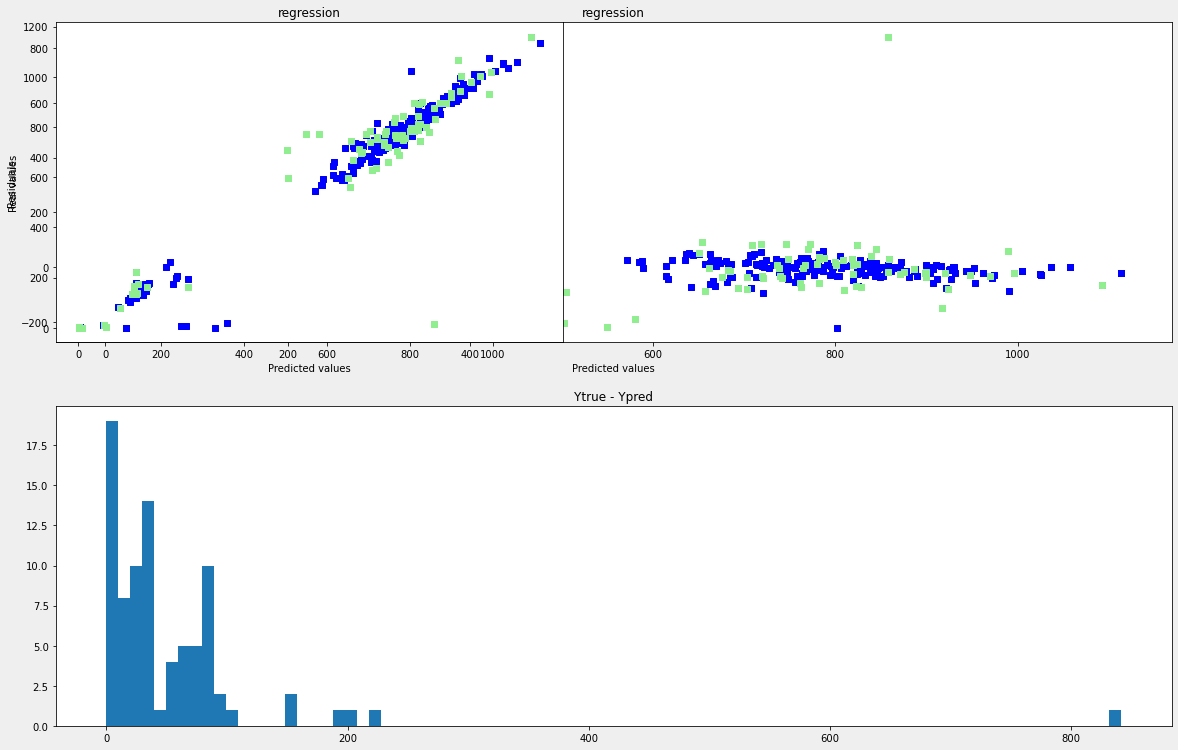

In [100]:
evalute_model(rf_random)
VizPredict(rf_random)

In [101]:
dfSinistresEtWeather.Conditions.replace('Clear',0,inplace = True)
dfSinistresEtWeather.Conditions.replace('Partially cloudy',1,inplace = True)
dfSinistresEtWeather.Conditions.replace('Rain',2,inplace = True)
dfSinistresEtWeather.Conditions.replace('Rain, Partially cloudy',3,inplace = True)

In [102]:
url='https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/Tunis/today?unitGroup=us&key=TTXUCEGRJQMG5F3AAEFBZF8GX'
res=requests.get(url).json()
df=pd.DataFrame(res['days'])
df = df[['datetime', 'tempmax',
      'tempmin', 'temp', 
      'precip', 'windspeed', 'winddir',
      'windgust', 'visibility', 'cloudcover', 'humidity',
      'conditions']] 
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d')
df['month'] = df['datetime'].dt.month
df['week'] = df['datetime'].dt.week
df['day'] = df['datetime'].dt.day
df['dayofweek'] = df['datetime'].dt.dayofweek

<ipython-input-102-42d09ba06c85>:11: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [103]:
url='https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/Tunis/today?unitGroup=us&key=TTXUCEGRJQMG5F3AAEFBZF8GX'
res=requests.get(url).json()
df=pd.DataFrame(res['days'])
df = df[['datetime', 'tempmax',
      'tempmin', 'temp', 
      'precip', 'windspeed', 'winddir',
      'windgust', 'visibility', 'cloudcover', 'humidity',
      'conditions']] 
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d')
df['month'] = df['datetime'].dt.month
df['week'] = df['datetime'].dt.week
df['day'] = df['datetime'].dt.day
df['dayofweek'] = df['datetime'].dt.dayofweek
df.drop(['datetime'],axis=1,inplace=True)
if(df.conditions.values == 'Clear'):
  df.conditions.replace('Clear',0,inplace = True)
elif(df.conditions.values == 'Partially cloudy'):
  df.conditions.replace('Partially cloudy',1,inplace = True)
elif(df.conditions.values == 'Rain'):
  df.conditions.replace('Rain',2,inplace = True)
elif(df.conditions.values == 'Rain, Partially cloudy'):
  df.conditions.replace('Rain, Partially cloudy',3,inplace = True)
df

<ipython-input-103-cad0085895a0>:11: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



,tempmax,tempmin,temp,precip,windspeed,winddir,windgust,visibility,cloudcover,humidity,conditions,month,week,day,dayofweek
0,76.9,58.9,67.4,0.0,11.4,156.8,9.8,7.7,26.3,59.9,1,4,17,28,2


In [104]:
df

,tempmax,tempmin,temp,precip,windspeed,winddir,windgust,visibility,cloudcover,humidity,conditions,month,week,day,dayofweek
0,76.9,58.9,67.4,0.0,11.4,156.8,9.8,7.7,26.3,59.9,1,4,17,28,2


In [105]:
X_train

,Maximum Temperature,Minimum Temperature,Temperature,Precipitation,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions,month,week,day,dayofweek
232,87.1,68.4,78.2,0.00,13.3,114.67,0.1,6.3,13.9,70.17,0,9,36,6,2
278,77.3,60.9,68.7,0.02,7.1,218.83,0.0,6.2,19.5,78.76,2,10,41,13,4
314,72.3,60.5,65.4,0.24,7.7,161.17,12.8,5.9,24.2,86.74,2,11,44,1,2
413,61.3,50.4,55.1,0.02,14.0,289.96,26.4,6.1,29.7,74.08,3,12,51,23,5
162,83.1,65.6,75.9,0.00,16.2,146.75,25.3,5.2,5.1,67.10,0,6,25,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,62.5,43.4,52.4,0.01,6.9,206.25,11.4,6.0,18.5,73.99,2,2,8,21,1
375,57.5,39.4,47.8,0.00,8.8,225.58,0.0,6.1,15.6,63.66,0,12,48,3,6
367,70.1,47.6,59.4,0.00,19.2,192.46,1.2,5.9,11.7,62.39,0,11,48,29,2
424,59.8,49.8,54.4,0.17,26.3,285.67,48.3,5.8,25.5,72.03,3,12,52,29,4


In [106]:
def predict_Accident_cuurent(model):
  url = 'https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/Tunis/today?unitGroup=us&key=TTXUCEGRJQMG5F3AAEFBZF8GX'
  res = requests.get(url).json()
  df = pd.DataFrame(res['days'])
  df = df[['datetime', 'tempmax',
        'tempmin', 'temp', 
        'precip', 'windspeed', 'winddir',
        'windgust', 'visibility', 'cloudcover', 'humidity',
        'conditions']] 
  df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d')
  df['month'] = df['datetime'].dt.month
  df['week'] = df['datetime'].dt.week
  df['day'] = df['datetime'].dt.day
  df['dayofweek'] = df['datetime'].dt.dayofweek
  df.drop(['datetime'],axis=1,inplace=True)
  if(df.conditions.values == 'Clear'):
    df.conditions.replace('Clear',0,inplace = True)
  elif(df.conditions.values == 'Partially cloudy'):
    df.conditions.replace('Partially cloudy',1,inplace = True)
  elif(df.conditions.values == 'Rain'):
    df.conditions.replace('Rain',2,inplace = True)
  elif(df.conditions.values == 'Rain, Partially cloudy'):
    df.conditions.replace('Rain, Partially cloudy',3,inplace = True)
  else: print('wrong values in Conditions Column')
  
  return int(model.predict(df))


In [107]:
from datetime import date
nbAccidentToday = predict_Accident_cuurent(rf_random)
clear_output()
print('Number of Accidents TODAY {}: We expect {} accidents.'.format(date.today() , nbAccidentToday))


Number of Accidents TODAY 2021-04-28: We expect 839 accidents.


In [108]:
import keras
from keras.models import Sequential
from keras.layers import Dense

ModuleNotFoundError: No module named 'keras'

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
deep_model = Sequential()
deep_model.add(Dense(units = 512,  activation = 'relu', input_dim = 18))
deep_model.add(Dense(units = 306,  activation = 'relu'))
deep_model.add(Dense(units = 128,  activation = 'relu'))
deep_model.add(Dense(units = 32,  activation = 'relu'))
deep_model.add(Dense(units = 8, activation = 'relu'))
deep_model.add(Dense(units = 1, activation = 'linear'))
deep_model.compile(loss='mean_squared_error', metrics=['mse', 'mae', 'mape'], optimizer='Adam')
deep_model.fit(X_train, Y_train, batch_size = 50, epochs = 1000, verbose=2,validation_data=(X_test, Y_test))